

## Actividad 2.

#### Dilsa Triana - Jorge Portella

Realizar las siguientes tareas:

* Crear una variable Binaria con respecto a la 
columna SalePrice, en donde 1 sea SalePrice mayor a 214000.000000
y 0 SalePrice Menor a 214000.000000.

* Una vez creada esta variable, se debe generar un modelo supervisado
que me pronostique el comportamiento de esta variable binaria. Utilizando las
demas columnas del data set.

ES IMPORTANTE QUE EN ESTE MODELO NO SE UTILICE
LAS VARIABLES ( Id, SalePrice)

* Los resultados a mostrar seran la importancia de las variables
y las metricas de la matriz de confusion.

* Se debe mostrar en un repositorio publico en github 
en un jupyter notebook.

EL Dataset para el ejercicio es el siguiente:
Se recomienda usar el dataset con las variables transformadas 
y data limpia ( pues esta fue la primera actividad).

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv


In [70]:
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew

# Preprocesado y modelado
# ------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Cargamos nuestra Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_data_path = 'train.csv'
test_data_path = 'test.csv'

train.info()
test.info()

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

train_df.head()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Mostramos nuestros Data Set seleccionados

In [47]:
test_df.head()
test_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
TRAIN_EXAMPLE = pd.read_csv("train.csv")

<AxesSubplot:>

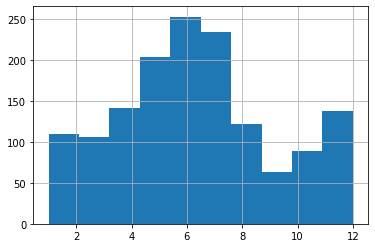

In [42]:
TRAIN_EXAMPLE.MoSold.hist()

In [43]:
TRAIN_EXAMPLE.MoSold.describe()

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

In [44]:
# se crea la variable Binaria (0-1) con columna SalePrice, en donde 1 sea SalePrice mayor a 214000.000000
# y 0 SalePrice Menor a 214000.000000.
TRAIN_EXAMPLE["NEW_Y_VAR"] = np.where(TRAIN_EXAMPLE['SalePrice']>214000.000000 , 1, 0)

In [45]:
# se crea la variable Binaria (0-1) con columna MoSold, en donde 1 sea SalePrice mayor a 214000.000000
# y 0 SalePrice Menor a 214000.000000.
TRAIN_EXAMPLE["NEW_Y_VAR"] = np.where(TRAIN_EXAMPLE['MoSold']>214000.000000 , 1, 0)
# No se tiene una incidente representativa al interior del modelo.

In [49]:
target = train['MoSold']
print (target.describe())

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


<AxesSubplot:xlabel='MoSold', ylabel='Density'>

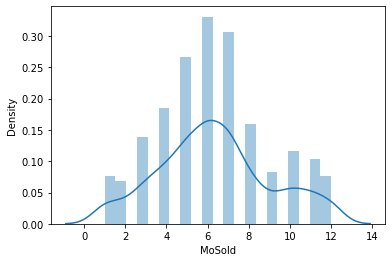

In [52]:
sns.distplot(target)

In [53]:
skew = target.skew()
kurt = target.kurt()

print ("Skewness: %f" %skew)
print ("Kurtosis: %f" %kurt)

Skewness: 0.212053
Kurtosis: -0.404109


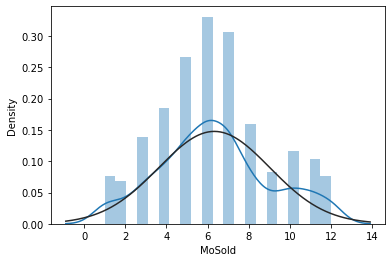

In [57]:
target_transform = np.log1p(target)
sns.distplot(target, fit=norm);

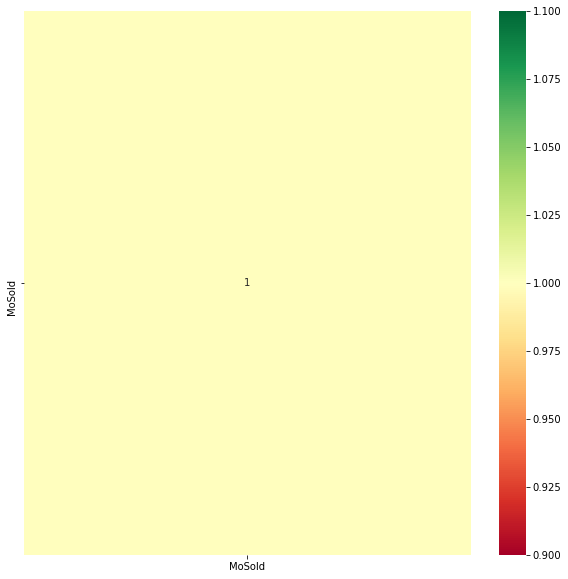

In [60]:
high_corr = train.corr()
high_corr_features = high_corr.index[abs(high_corr["MoSold"])>0.2]

plt.figure(figsize=(10,10))
mat = sns.heatmap(train[high_corr_features].corr(), annot=True, cmap="RdYlGn")

### Modelo

Como en todo estudio de regresión, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer la posterior evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [80]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "MEDV"),
                                        datos['MEDV'],
                                        random_state = 123
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


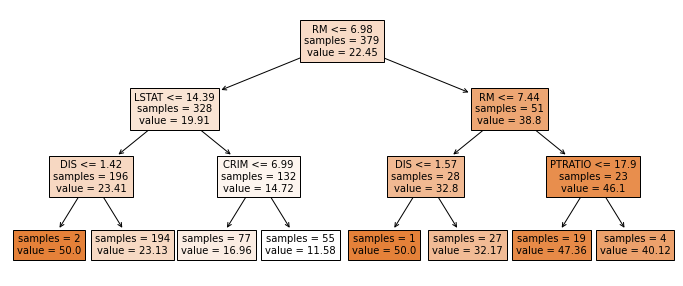

In [81]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [82]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(datos.drop(columns = "MEDV").columns)
               )
print(texto_modelo)

|--- RM <= 6.98
|   |--- LSTAT <= 14.39
|   |   |--- DIS <= 1.42
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.42
|   |   |   |--- value: [23.13]
|   |--- LSTAT >  14.39
|   |   |--- CRIM <= 6.99
|   |   |   |--- value: [16.96]
|   |   |--- CRIM >  6.99
|   |   |   |--- value: [11.58]
|--- RM >  6.98
|   |--- RM <= 7.44
|   |   |--- DIS <= 1.57
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.57
|   |   |   |--- value: [32.17]
|   |--- RM >  7.44
|   |   |--- PTRATIO <= 17.90
|   |   |   |--- value: [47.36]
|   |   |--- PTRATIO >  17.90
|   |   |   |--- value: [40.12]



In [83]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [84]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "MEDV").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,RM,0.671680
12,LSTAT,0.222326
7,DIS,0.064816
0,CRIM,0.034714
10,PTRATIO,0.006465
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000


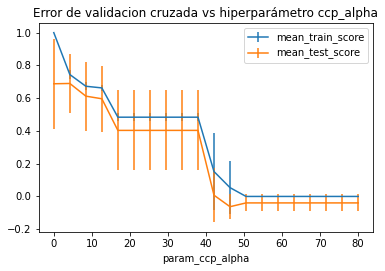

In [85]:
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [86]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 4.2105263157894735}

Profundidad del árbol: 2
Número de nodos terminales: 4


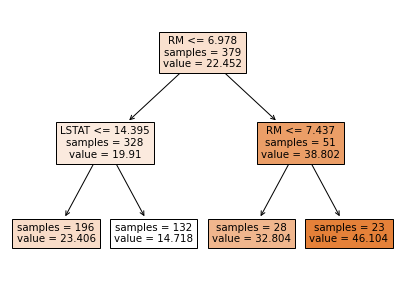

In [87]:
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = datos.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [88]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 6.358813326315407


In [89]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 5.91713823276661


### Refelxion Final
El proceso de pruning consigue reducir el error rmse del modelo de 6.36 a 5.92. Las predicciones del modelo final se alejan en promedio 5.92 unidades (5920 dólares) del valor real.